In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
import time

In [2]:
df = pd.read_csv('D:\EPAM Internship\Python/my_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [20]:
other_df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
other_df['Relatives'] = df.SibSp + df.Parch
other_df.dropna(inplace=True)
other_df.Sex.replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
other_df['S'] = (other_df.Embarked == 'S').apply(int)
other_df['C'] = (other_df.Embarked == 'C').apply(int)
other_df['Q'] = (other_df.Embarked == 'Q').apply(int)
other_df.drop('Embarked', axis=1, inplace=True)
for i in range(7):
    other_df[str(i)] = (other_df.Relatives == i).apply(int)
other_df['7'] = (other_df.Relatives >= 7).apply(int)
other_df.drop('Relatives', axis=1, inplace=True)

<ipython-input-20-627b302b4631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['Relatives'] = df.SibSp + df.Parch
<ipython-input-20-627b302b4631>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df.dropna(inplace=True)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4575: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r

In [21]:
X = other_df.drop('Survived', axis=1)
y = other_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [22]:
X.Sex.value_counts(), 54016/42316

(0    54016
 1    42316
 Name: Sex, dtype: int64,
 1.2764911617355137)

In [23]:
X_train.Sex.value_counts(), 43254/33811

(0    43254
 1    33811
 Name: Sex, dtype: int64,
 1.279287805743693)

Simple decision tree

In [24]:
clf_simple = DecisionTreeClassifier()
clf_simple.fit(X_train, y_train)
print('Train score:', clf_simple.score(X_train, y_train))
print('Test score:', clf_simple.score(X_test, y_test))

Train score: 0.9942516057873224
Test score: 0.6831369699486168


In [25]:
clf_simple.get_depth()

58

In [26]:
clf_simple.feature_importances_

array([0.03333132, 0.26048893, 0.19956672, 0.40838403, 0.03189635,
       0.01951209, 0.00247285, 0.01041322, 0.00902391, 0.0078966 ,
       0.00623554, 0.0033918 , 0.00364155, 0.0018943 , 0.00185077])

In [27]:
predicted = clf_simple.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.6313186150319701
Recall: 0.631852209611205


------------------

Small decision tree

In [13]:
clf_small = DecisionTreeClassifier(max_depth=2)
clf_small.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [14]:
print('Train score:', clf_small.score(X_train, y_train))
print('Test score:', clf_small.score(X_test, y_test))

Train score: 0.7579056640498281
Test score: 0.7579280635283127


In [15]:
clf_small.feature_importances_

array([0.        , 0.84546882, 0.        , 0.        , 0.09569186,
       0.05883932, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [16]:
predicted = clf_small.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.731692604656774
Recall: 0.7131099353321576


----------------------

Dependency on maximal tree depth

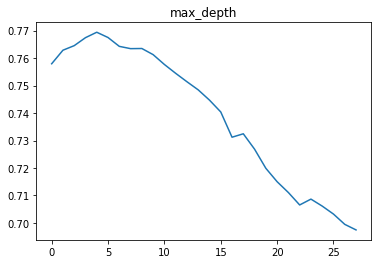

In [28]:
acc = []
for max_depth in range(2, 30):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(acc)
plt.title('max_depth')
plt.show()

--------------------

Dependency on min_samples_split parameter

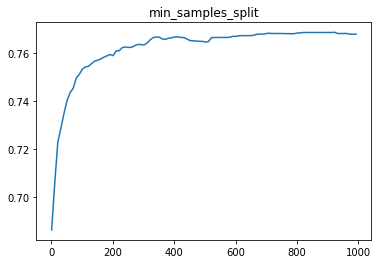

In [37]:
acc = []
values = range(2, 1000, 10)
for min_samples_split in values:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_split')
plt.show()

---------------------

Dependency on min_samples_leaf parameter

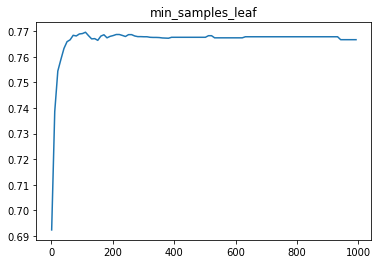

In [38]:
acc = []
values = range(2, 1000, 10)
for min_samples_leaf in values:
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_leaf')
plt.show()

----------------------

In [39]:
clf_other_best = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_split': range(200, 1000, 50),
    'min_samples_leaf': range(50, 600, 50),
})

In [40]:
start = time.time()
clf_other_best.fit(X_train, y_train)
print(time.time() - start)

426.18682408332825


In [41]:
print('Train score:', clf_other_best.score(X_train, y_train))
print('Test score:', clf_other_best.score(X_test, y_test))

Train score: 0.7719457600726659
Test score: 0.7686718222868116


In [42]:
clf_other_best.best_estimator_

DecisionTreeClassifier(min_samples_leaf=50, min_samples_split=900)

In [43]:
predicted = clf_other_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.7307274701411509
Recall: 0.731345085728085


In [44]:
clf_other_best.best_estimator_.tree_.max_depth

20

In [36]:
clf_the_best = DecisionTreeClassifier(min_samples_leaf=100, min_samples_split=100)
clf_the_best.fit(X_train, y_train)
print('Train score:', clf_the_best.score(X_train, y_train))
print('Test score:', clf_the_best.score(X_test, y_test))

Train score: 0.7763705962499189
Test score: 0.7690870400166087


In [63]:
other_df.Relatives.value_counts()

0     59569
1     13693
2     10372
3      8506
4      1810
5      1225
6       479
9       308
10      125
8       111
7        98
11       20
12        6
13        5
14        3
17        2
Name: Relatives, dtype: int64

In [29]:
other_df.head()

,Survived,Pclass,Sex,Age,Fare,S,C,Q,0,1,2,3,4,5,6,7
2,0,3,0,0.33,71.29,1,0,0,0,0,0,1,0,0,0,0
3,0,3,0,19.00,13.04,1,0,0,1,0,0,0,0,0,0,0
4,1,3,0,25.00,7.76,1,0,0,1,0,0,0,0,0,0,0
5,0,2,0,35.00,6.71,1,0,0,1,0,0,0,0,0,0,0
6,0,3,0,7.00,9.77,1,0,0,1,0,0,0,0,0,0,0
